In [3]:
import czifile
import czifile
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
img = czifile.imread('../data/C22_rat11_M.czi')


In [4]:
print(img.shape)

(1, 1, 1, 3996, 7783, 1)


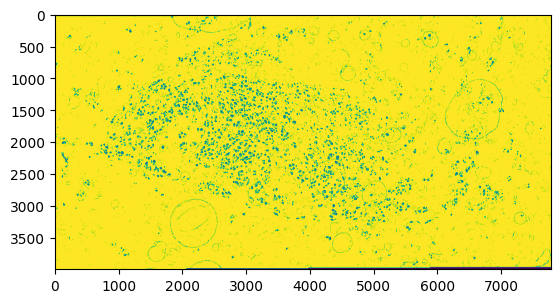

In [5]:
channels = []
for channel in range(1):
    channel_raster = img[0,0,channel,:,:,0]
    channels.append(channel_raster)
arr = np.stack(channels, axis=2)
plt.imshow(arr)

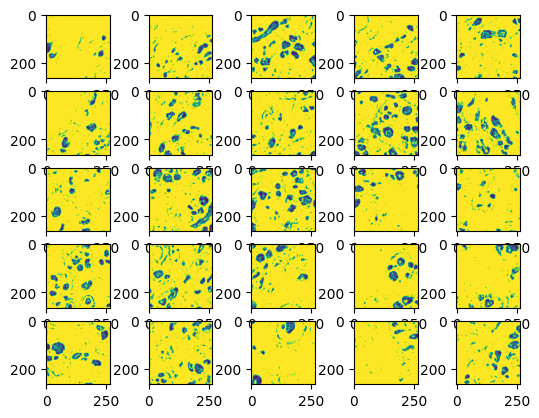

In [6]:
nb_photo = 5
photo_dim= 265
start = [1000,1000]
fig, axs = plt.subplots(nb_photo, nb_photo)
for i in range(nb_photo):
    for j in range(nb_photo):
        arr = img[0,0,channel,start[0]+i*photo_dim:start[0]+(i+1)*photo_dim,start[1]+j*photo_dim:start[1]+(j+1)*photo_dim,0]
        axs[i, j].imshow(arr)
        